
# Titanic Overview:
## What factors made people more likely to survive the Titanic? This analysis will investigate how age, class, fare and sex effect the chances of surviving the sinking of the Titanic. Testing the primary hypothesis that women were more likely to survive across all the three classes.

In [1]:
# Importing an assortment of packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# you may have to input your own path to the Titanic dataset
filename = '/home/g/Documents/DataAnalysis/Titanic_Udacity/titanic_data.csv'


## Cleaning up the data:
#### In our initial exploration of the data I discovered missing values in the following columns:
  * Age 
  * Cabin
  * Embarked
#### We will only be concerned with fixing Age as we will not be investigating Cabin or Embarked values in this analysis. We could remove all the passengers missing an age but that would reduce our sample size by 177, thus we will replace the missing ages with the average age. We are doing so since we our standard deviation is 14.5 and we seems to have no outliers. In other cases where outliers are common we would use median value or nearest neighbor.

In [3]:
titanic_df = pd.read_csv(filename)    # using pandas' built-in function we create a data frame
print titanic_df.describe()
print " "
print titanic_df.info() 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data co

In [4]:
# takes count of passengers and subtracts number of non NaN age values and returns result with description
def passengers_missing_age():
    number_of_passengers_to_report = titanic_df['PassengerId'].count() - titanic_df['Age'].count()
    return "Number of Passenger missing age: " + str(number_of_passengers_to_report)
print passengers_missing_age()

Number of Passenger missing age: 177


In [5]:
titanic_df.head()    # we can see how cleanly a data frame is represented, columns are labeled appropriately and
                     # numbers are expressed as floats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df['Age'] # observing number of ages is smaller then most of our 
                  # other values we will replace all NaN with average age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

#### Here we are using .fillna to replace all NaN instances in Age with the mean value of Age.

In [7]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean()) # replaces all NaN age with mean age
titanic_df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [8]:
print titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [9]:
#### We can verify using both .info() and our function which finds the difference in data counts

In [10]:
print passengers_missing_age()

Number of Passenger missing age: 0


## Fare is highest for first class and lowest for third. (Obvious but nice to see in a visualization)

Populating the interactive namespace from numpy and matplotlib
None


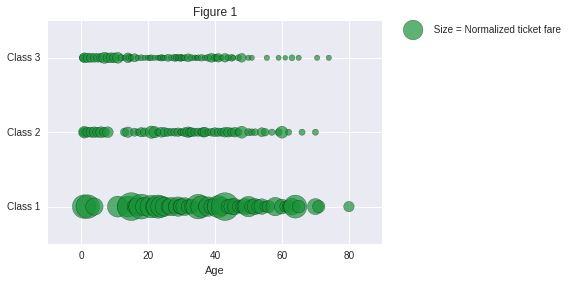

In [11]:
%pylab inline

data_by_age_class = titanic_df.groupby(['Age', 'Pclass'],
                                    as_index=False).mean()
                                    
scaled_fare = 150*(data_by_age_class['Fare'] /
                    data_by_age_class['Fare'].std())
def fig1():                    
    fig1 = plt.scatter(data_by_age_class['Age'], data_by_age_class['Pclass'],
            s=scaled_fare, c=(0.09529353,  0.57693255,  0.21642882), alpha=.7, label = " Size = Normalized ticket fare")
    plt.xlabel('Age')
    plt.yticks((1, 2, 3), ('Class 1', 'Class 2','Class 3'))
    plt.title('Figure 1')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print fig1()


## Third class female are more likely to survive then first class men.

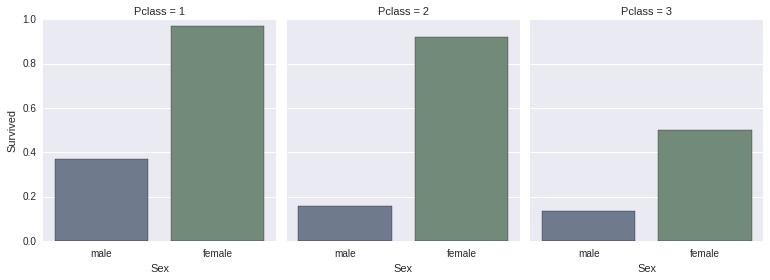

In [12]:
fig2 = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_df,
                      saturation=.3, kind="bar", ci=None, aspect=.9)


### We are seeing younger males had a better chance of surviving and women had a better chance across all ages.

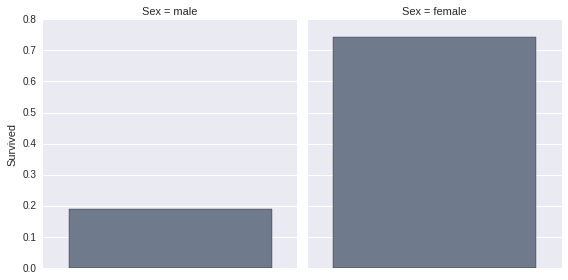

In [13]:
fig3 = sns.factorplot(y="Survived", col="Sex", data=titanic_df, saturation=.3, kind="bar", 
                      ci=None, aspect=1)

### Sex and Age 
#### I was surprised to find first class male passengers under 15 all survived while females in the same class and age group did not.
#### I can not explain the result, but third class males seem to be doing better off then second class, but further investigation would be very insightful.


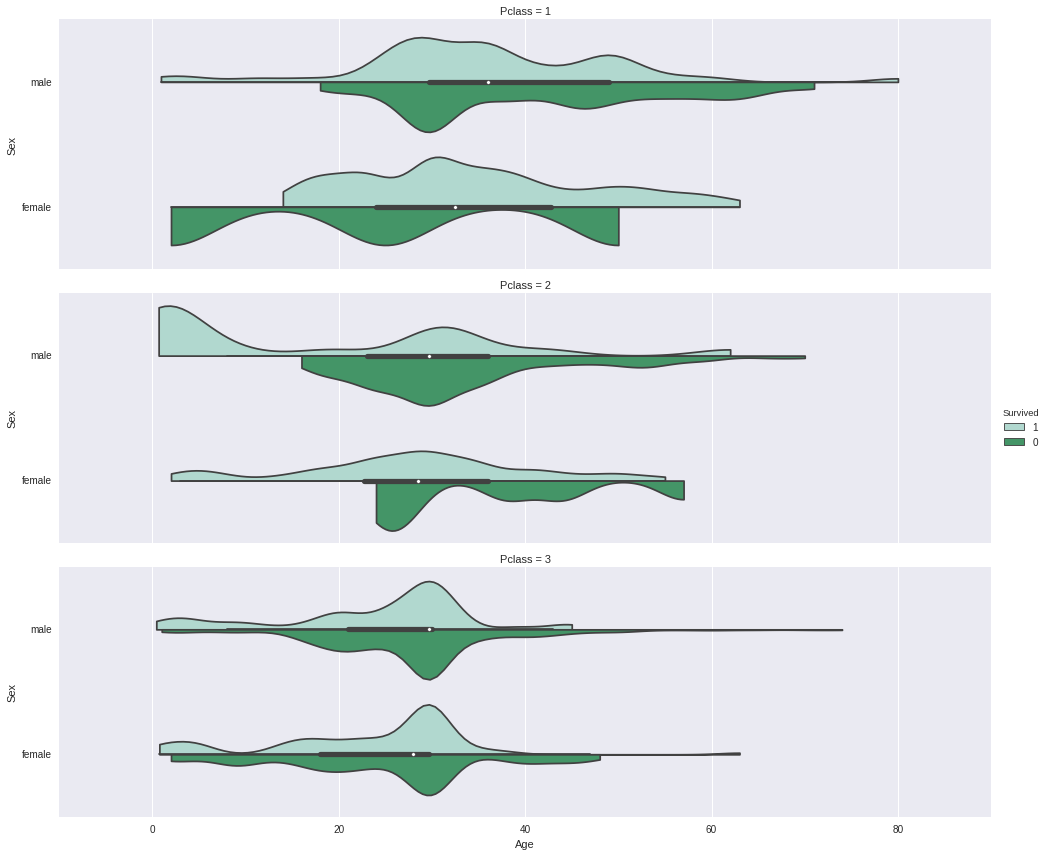

In [14]:
fig4 = sns.factorplot('Age','Sex', hue = 'Survived', row = 'Pclass', data = titanic_df, hue_order = [1,0],
                    orient="h",  aspect=3.5, palette="BuGn",
                    kind="violin", split=True, cut=0, bw=.2)
(fig4.set_axis_labels("Age", "Sex")) 

### Another Interesting result is how much better solo passengers in 3rd class did compared to other classes. One could say when you are just fending for yourself your outcome might be in your favor. Clarification from Kagale about SibSp definition in the data set :

"With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations."

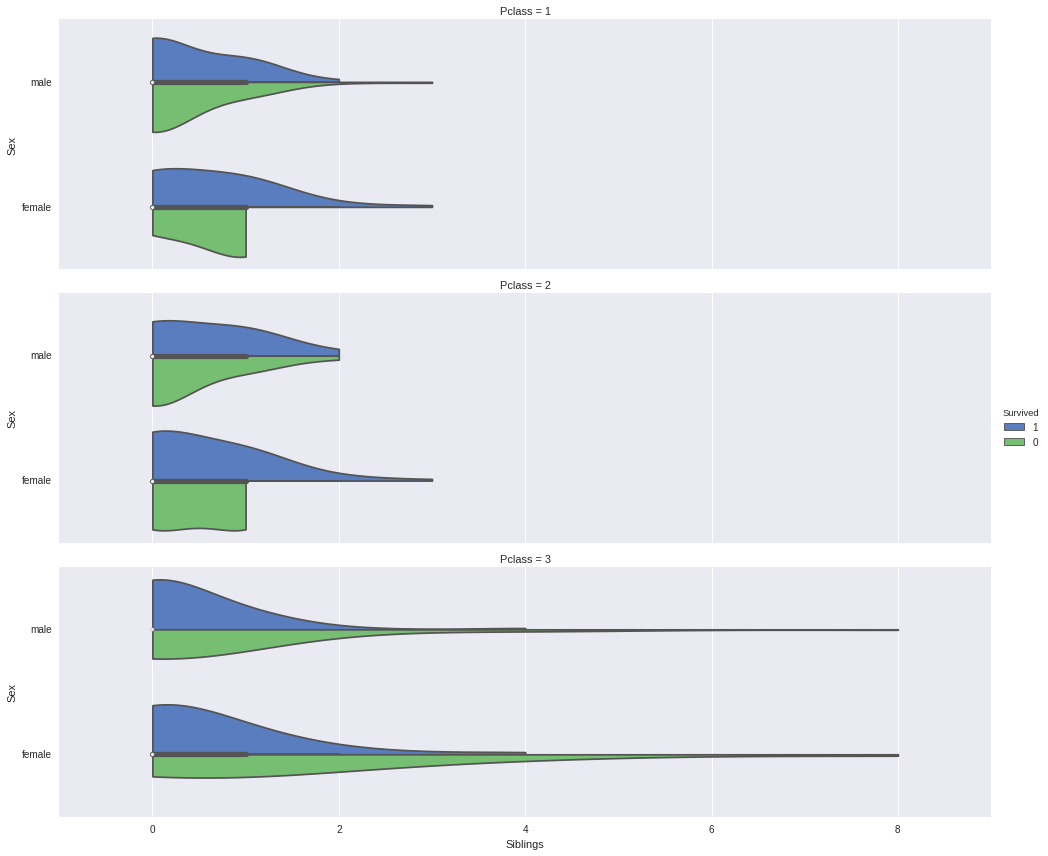

In [15]:
fig5 = sns.factorplot('SibSp','Sex', hue = 'Survived', row = 'Pclass', data = titanic_df, hue_order = [1,0],
                    orient="h",  aspect=3.5, palette="muted",
                    kind="violin", split=True, cut=0, bw=.8)
(fig5.set_axis_labels("Siblings", "Sex")) 

### Conclusion:
#### First class, 20-28, female were the most likely to survive according to my analysis, but much more rigorous statistical analysis would be needed to verify these findings.
#### We have to be critical of these result since the actual death toll is not known.  According the the Wikipidia article "The death toll has been put at between 1,490 and 1,635 people" and it seems like issues with the passenger list are to blame since there might have been some passengers who canceled at the last minute and others who traveled with alias names.

### Leonardo Di Caprio sacrificed himself to save his beloved partner. I figured women were more likely to survive then men.The data seems to corroborate with my hypothesis, every chart shows women surviving at a higher rate. I would like to use some statistical analysis to be able to tell you how significant my results. I used the visual representation to come up with my findings. I would be more confident in the results if I was able to correct for the missing ages in the data. I feel the mean age is over represented, and knowing the records were not very complete, I wonder if the results would be different if we took in to account the deaths due to injuries after the event. My understanding is many survivors died soon after, it would be interesting to review the result.

### I would like to further explore the effect embarkment had on rate of survival. It's a shame that part of the data is incomplete.

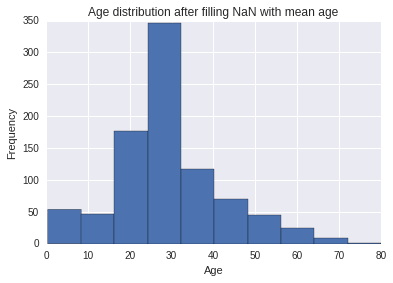

In [16]:
plt.hist(titanic_df['Age'])
plt.title("Age distribution after filling NaN with mean age")
plt.xlabel("Age")
plt.ylabel("Frequency")

fig6 = plt.gcf() # graph used to visualize mean age over representation

Resources used:

http://seaborn.pydata.org/generated/seaborn.factorplot.html

https://www.kaggle.com/c/titanic/data

http://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median

https://en.wikipedia.org/wiki/RMS_Titanic
    